<h1><center>Data Exploration</h1>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

from scipy.stats import shapiro, spearmanr, kendalltau
from scipy.stats import mannwhitneyu, kruskal
from scipy.stats import chi2_contingency
import statsmodels.api as sm

import pandas as pd
import numpy as np

from datetime import datetime

In [3]:
df = pd.read_csv("train.csv")

## Analyse préliminaire

In [4]:
# Nous avons 780 lignes et 39 colonnes
df.shape

(100000, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
# Taux de Na pour chaque variable
# deux variables avec des Na gender et city
(df.isna().sum() / len(df)) * 100

ID                          0.0
Customer_ID                 0.0
Month                       0.0
Name                        0.0
Age                         0.0
SSN                         0.0
Occupation                  0.0
Annual_Income               0.0
Monthly_Inhand_Salary       0.0
Num_Bank_Accounts           0.0
Num_Credit_Card             0.0
Interest_Rate               0.0
Num_of_Loan                 0.0
Type_of_Loan                0.0
Delay_from_due_date         0.0
Num_of_Delayed_Payment      0.0
Changed_Credit_Limit        0.0
Num_Credit_Inquiries        0.0
Credit_Mix                  0.0
Outstanding_Debt            0.0
Credit_Utilization_Ratio    0.0
Credit_History_Age          0.0
Payment_of_Min_Amount       0.0
Total_EMI_per_month         0.0
Amount_invested_monthly     0.0
Payment_Behaviour           0.0
Monthly_Balance             0.0
Credit_Score                0.0
dtype: float64

In [8]:
nb_doublons = df.duplicated().sum()
print("Nombre de doublons :", nb_doublons)

Nombre de doublons : 0


## Exploration des variables

#### Pour chaque Variable:
- Info
- Taux de Na
- Valeurs et Nombre de valeurs distinctes
- Étendue des valeurs, Équilibre
- Graphique en barres pour la fréquence de chaque catégorie 
- Distribution normale ou non pour les variables quantitatives (test Shapiro)

| Nom de la variable | Description | Nom de la varaible | Description                           |
| ------------------ | --------------- | ----------------- | ------------------------------------- |
| age          | age de la personne             | Month                | le mois de l'année          |
| Occupation          | la profession de la personne           | Annual_Income           | le revenu annuel de la personne      |
| Monthly_Inhand_Salary          | salaire mensuel en main de la personne         | Num_Bank_Accounts             |  le nombre de comptes bancaires de la personne        |
| Num_Credit_Card              | nombre de cartes de crédit dont dispose la personne          | Interest_Rate              | le taux d'intérêt sur la carte de crédit de la personne                                |
| Num_of_Loan          | le nombre de prêts contractés par la personne auprès de la banque            | Delay_from_due_date                | le nombre moyen de jours de retard par la personne à compter de la date de paiement         |
| Num_of_Delayed_Payment          | nombre de paiements retardés par la personne             | Num_Credit_Inquiries          | le nombre de demandes de carte de crédit par la personne         |
| Outstanding_Debt         | le solde impayé de la personne           | Credit_Utilization_Ratio               | le taux d'utilisation du crédit de la carte de crédit du client          |
| Credit_History_Age                | âge des antécédents de crédit de la personne            | Total_EMI_per_month                |  L'EMI total par mois de la personne                                  |
| Amount_invested_monthly          |  le montant mensuel investi par la personne           | Payment_Behaviour              | le comportement de paiement de la personne         |
| Monthly_Balance         |  le solde mensuel laissé sur le compte de la personne          | Credit_Score             | le pointage de crédit de la personne         |


### Variables explicatives

### Variable cible: Credit_Score

In [9]:
df["Credit_Score"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_Score
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [10]:
# Valeurs et Nombre de valeurs distinctes
print(df["Credit_Score"].unique())
df["Credit_Score"].nunique()

['Good' 'Standard' 'Poor']


3

In [11]:
# Étendue des valeurs, Équilibre
df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

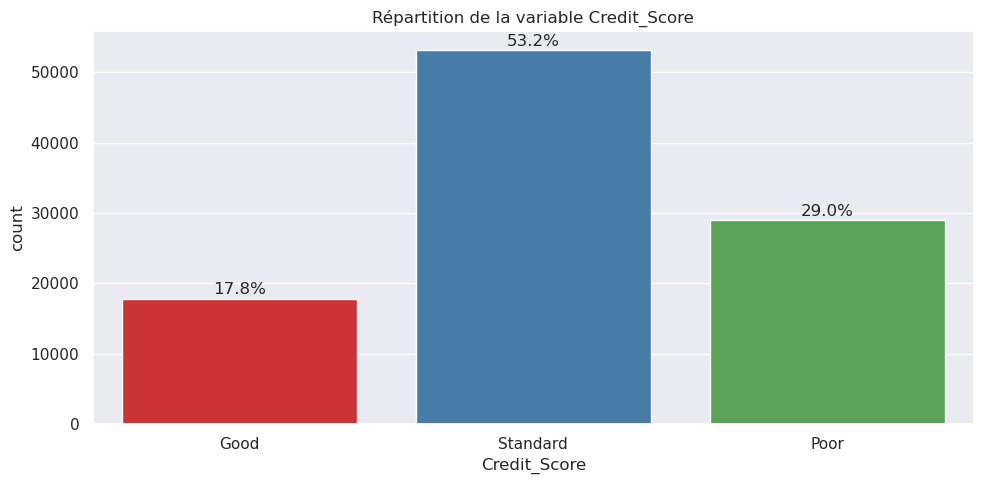

In [13]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    x="Credit_Score", data=df, palette="Set1", hue="Credit_Score", legend=False
)
plt.title("Répartition de la variable Credit_Score")

total = len(df["Credit_Score"])
for p in ax.patches:
    percentage = f"{100*p.get_height()/total:.1f}%\n"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="center")

plt.tight_layout()
plt.show()

#### Variables qualitatives

##### Month

In [21]:
correspondance_mois = {
    1: "janvier",
    2: "février",
    3: "mars",
    4: "avril",
    5: "mai",
    6: "juin",
    7: "juillet",
    8: "aout",
    9: "septembre",
    10: "octobre",
    11: "novembre",
    12: "decembre",
}
df["Month"] = df["Month"].replace(correspondance_mois)

In [22]:
df["Month"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Month
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [23]:
# Taux de na
(df["Month"].isna().sum()) / (len(df.index))

0.0

In [24]:
# Valeurs et Nombre de valeurs distinctes
print(df["Month"].unique())
df["Month"].nunique()

['janvier' 'février' 'mars' 'avril' 'mai' 'juin' 'juillet' 'aout']


8

In [25]:
# Étendue des valeurs, Équilibre
df["Month"].value_counts()

Month
janvier    12500
février    12500
mars       12500
avril      12500
mai        12500
juin       12500
juillet    12500
aout       12500
Name: count, dtype: int64

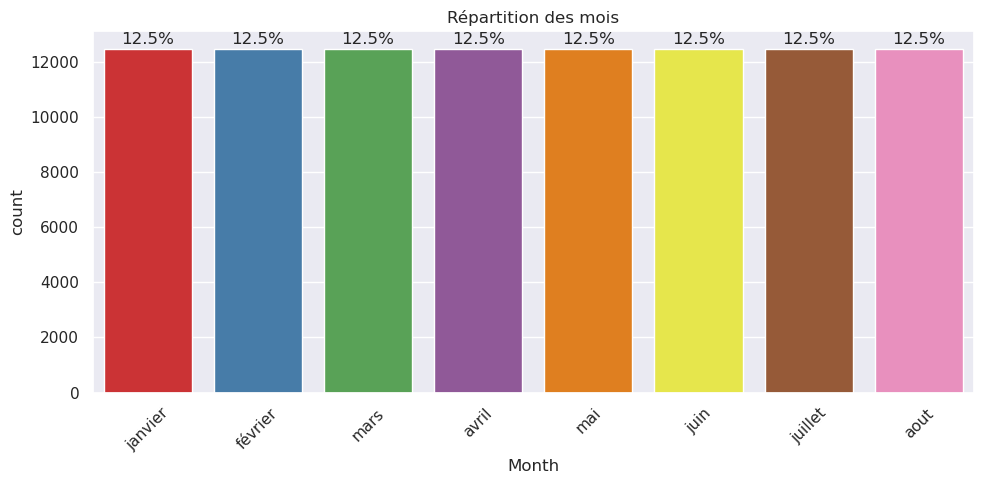

In [28]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Month", data=df, palette="Set1", hue="Month", legend=False)
plt.title("Répartition des mois")

total = len(df["Month"])
for p in ax.patches:
    percentage = f"{100*p.get_height()/total:.1f}%\n"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="center")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

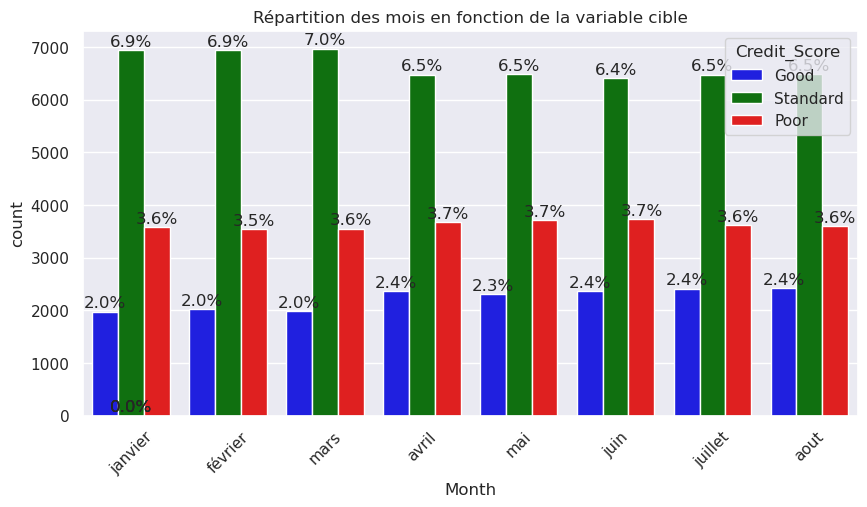

In [29]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    x="Month",
    data=df,
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    legend=True,
    dodge=True,
)
plt.title("Répartition des mois en fonction de la variable cible")

total = len(df["Month"])
for p in ax.patches:
    percentage = f"{100*p.get_height()/total:.1f}%\n"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="center")

plt.xticks(rotation=45)
plt.show()

##### Occupation

In [30]:
df["Occupation"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Occupation
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [31]:
# Taux de na
(df["Occupation"].isna().sum()) / (len(df.index))

0.0

In [32]:
# Valeurs et Nombre de valeurs distinctes
print(df["Occupation"].unique())
df["Occupation"].nunique()

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


15

In [33]:
# Étendue des valeurs, Équilibre
df["Occupation"].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

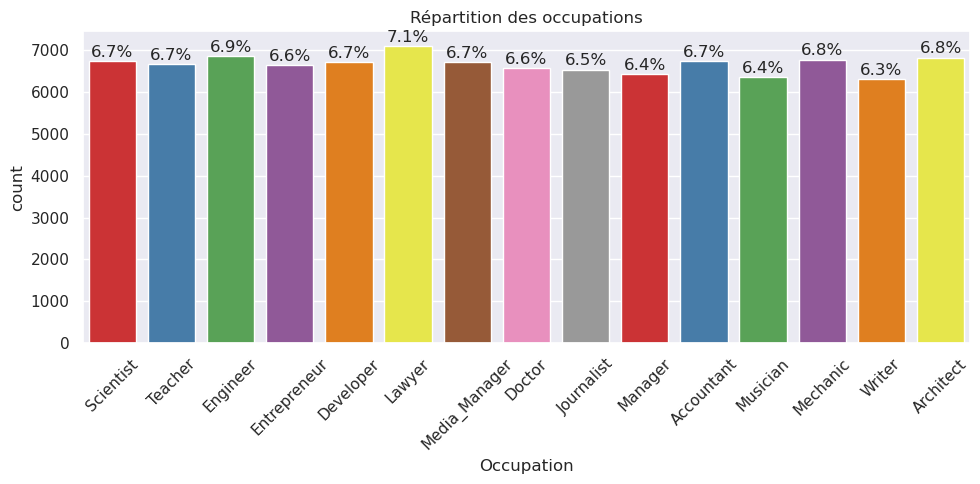

In [34]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    x="Occupation", data=df, palette="Set1", hue="Occupation", legend=False
)
plt.title("Répartition des occupations")

total = len(df["Occupation"])
for p in ax.patches:
    percentage = f"{100*p.get_height()/total:.1f}%\n"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="center")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

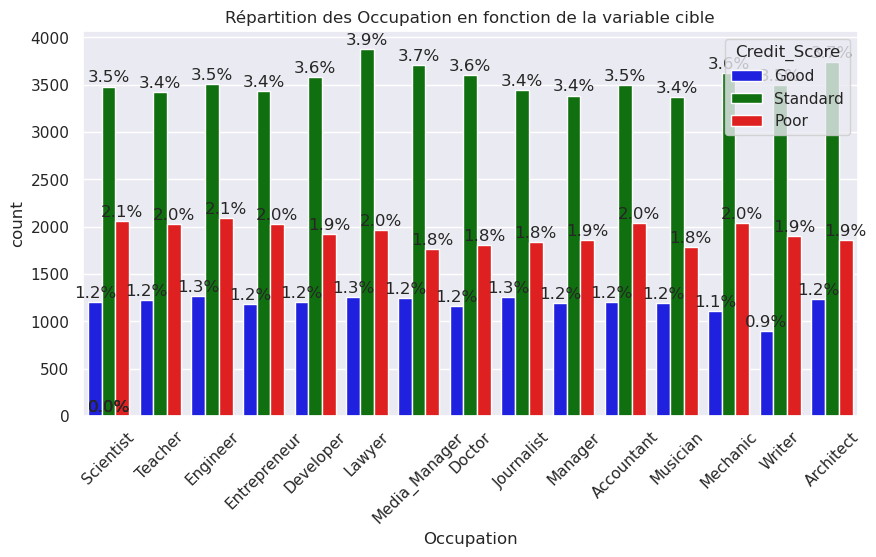

In [35]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    x="Occupation",
    data=df,
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    legend=True,
    dodge=True,
)
plt.title("Répartition des Occupation en fonction de la variable cible")

total = len(df["Occupation"])
for p in ax.patches:
    percentage = f"{100*p.get_height()/total:.1f}%\n"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="center")

plt.xticks(rotation=45)
plt.show()

##### Payment_Behaviour

In [13]:
df["Payment_Behaviour"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Payment_Behaviour
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [14]:
# Taux de na
(df["Payment_Behaviour"].isna().sum()) / (len(df.index))

0.0

In [6]:
# Valeurs et Nombre de valeurs distinctes
print(df["Payment_Behaviour"].unique())
df["Payment_Behaviour"].nunique()

['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']


6

In [15]:
# Étendue des valeurs, Équilibre
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

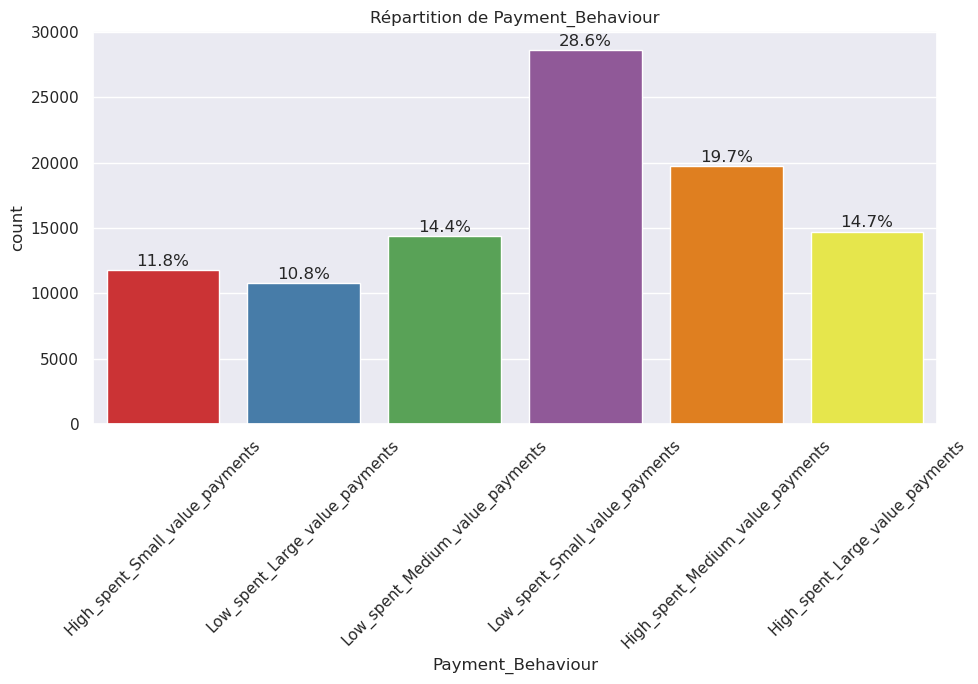

In [19]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(
    x="Payment_Behaviour",
    data=df,
    palette="Set1",
    hue="Payment_Behaviour",
    legend=False,
)
plt.title("Répartition de Payment_Behaviour")

total = len(df["Payment_Behaviour"])
for p in ax.patches:
    percentage = f"{100*p.get_height()/total:.1f}%\n"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="center")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

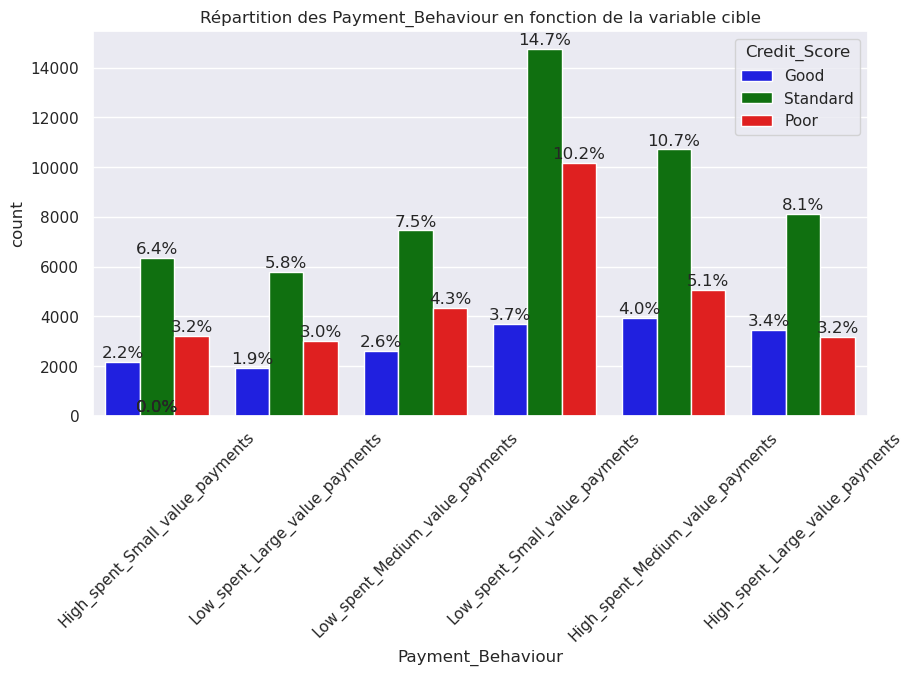

In [20]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    x="Payment_Behaviour",
    data=df,
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    legend=True,
    dodge=True,
)
plt.title("Répartition des Payment_Behaviour en fonction de la variable cible")

total = len(df["Payment_Behaviour"])
for p in ax.patches:
    percentage = f"{100*p.get_height()/total:.1f}%\n"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="center", va="center")

plt.xticks(rotation=45)
plt.show()

#### Variables quantitatives

##### Annual_Income

In [21]:
# type, nombres valeurs
df["Annual_Income"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Annual_Income
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [22]:
# Taux de na
(df["Annual_Income"].isna().sum()) / (len(df.index))

0.0

In [23]:
# Valeurs et Nombre de valeurs distinctes
print(df["Annual_Income"].unique())
df["Annual_Income"].nunique()

[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]


12488

In [24]:
# Étendue des valeurs, Équilibre
df["Annual_Income"].value_counts()

Annual_Income
36585.120    16
40341.160    16
32543.380    16
72524.200    16
22434.160    16
             ..
60573.960     8
18413.795     8
30622.730     8
15968.780     8
81066.720     8
Name: count, Length: 12488, dtype: int64

In [25]:
# Valeur Minimale
df["Annual_Income"].min()

7005.93

In [26]:
# Valeur Maximale
df["Annual_Income"].max()

179987.28

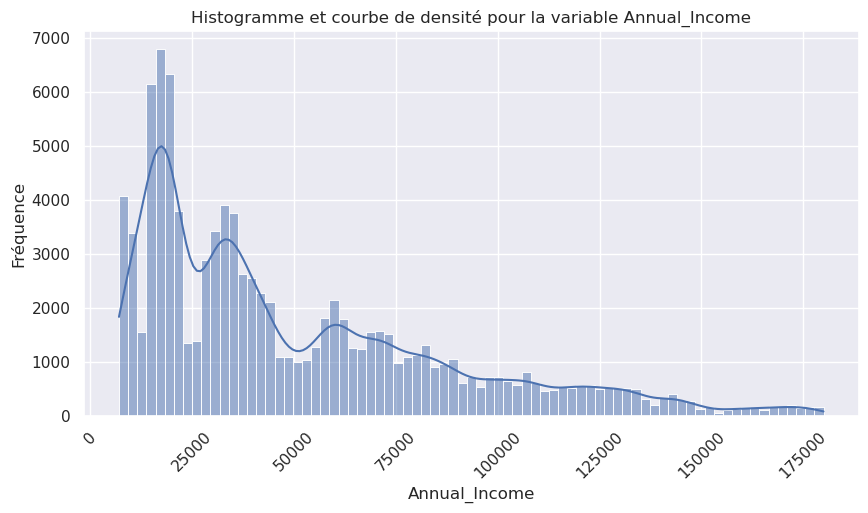

In [27]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Annual_Income")
sns.histplot(df_sorted["Annual_Income"], kde=True)
plt.xlabel("Annual_Income")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour la variable Annual_Income")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

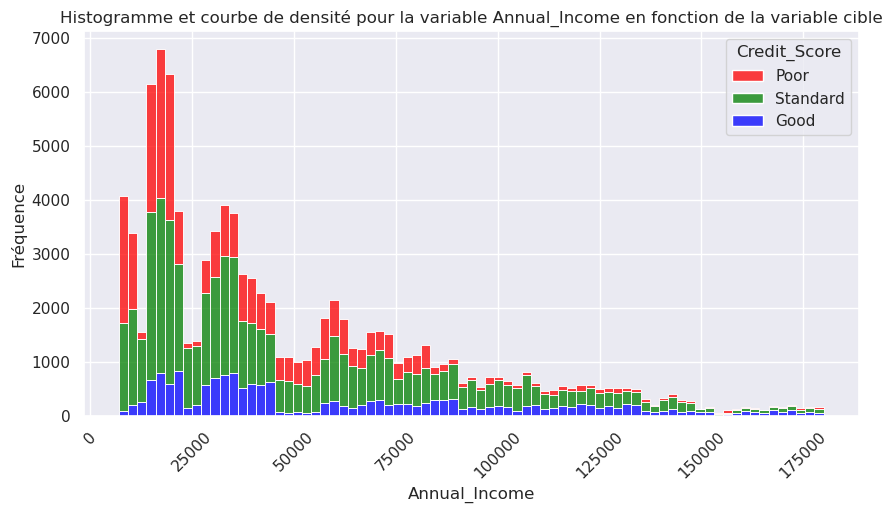

In [29]:
df_sorted = df.sort_values("Annual_Income")
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_sorted,
    x="Annual_Income",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Annual_Income")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Annual_Income en fonction de la variable cible"
)
plt.xticks(rotation=45)
plt.show()

In [28]:
stat, p = shapiro(df["Annual_Income"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.879700140113197
P-value : 2.0192951804987717e-117
La variable n'est probablement pas normalement distribuée


/tmp/ipykernel_677242/1392400205.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  stat, p = shapiro(df['Annual_Income'])


##### Age

In [4]:
# type, nombres valeurs
df["Age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Age
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [5]:
# Taux de na
(df["Age"].isna().sum()) / (len(df.index))

0.0

In [6]:
# describe()
df["Age"].describe()

count    100000.000000
mean         33.316340
std          10.764812
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

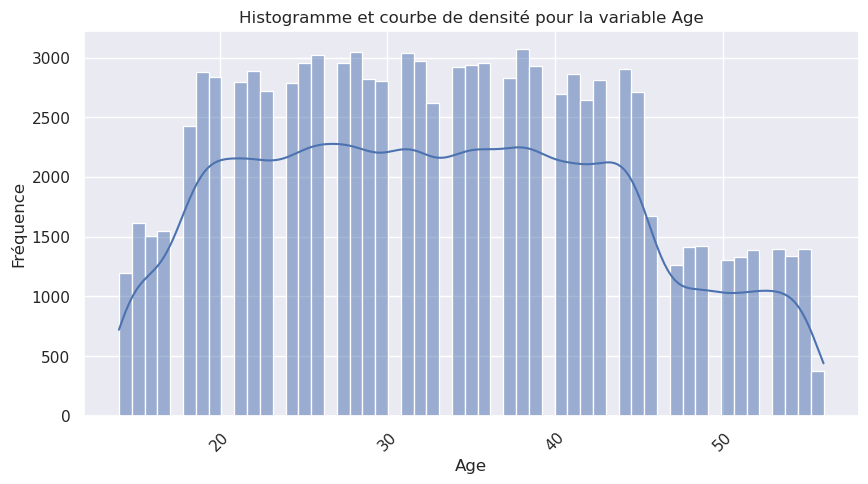

In [7]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Age")
sns.histplot(df_sorted["Age"], kde=True)
plt.xlabel("Age")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour la variable Age")
plt.xticks(rotation=45)
plt.show()

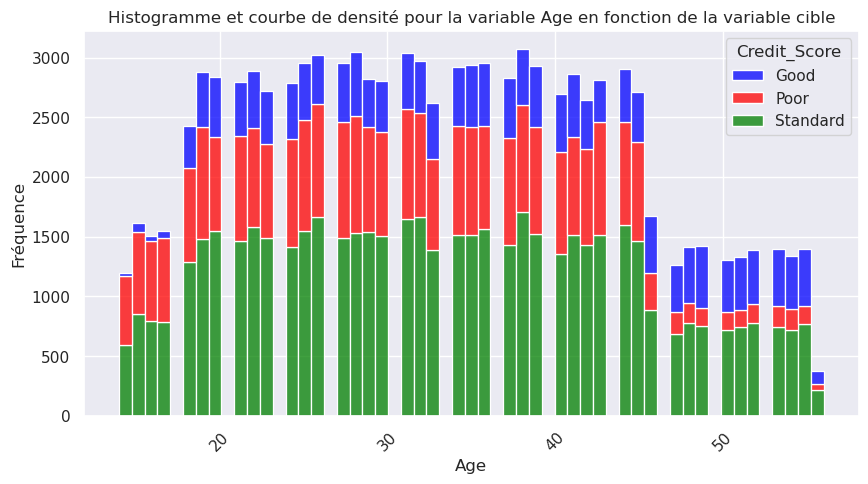

In [8]:
df_sorted = df.sort_values("Age")
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_sorted,
    x="Age",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Age")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Age en fonction de la variable cible"
)
plt.xticks(rotation=45)
plt.show()

In [9]:
stat, p = shapiro(df["Age"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.9733352785307163
P-value : 5.1134477388500565e-79
La variable n'est probablement pas normalement distribuée


/opt/mamba/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


##### Monthly_Inhand_Salary

In [30]:
# type, nombres valeurs
df["Monthly_Inhand_Salary"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Monthly_Inhand_Salary
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [31]:
# Taux de na
(df["Monthly_Inhand_Salary"].isna().sum()) / (len(df.index))

0.0

In [32]:
# Valeurs et Nombre de valeurs distinctes
print(df["Monthly_Inhand_Salary"].unique())
df["Monthly_Inhand_Salary"].nunique()

[ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]


13241

In [33]:
# Étendue des valeurs, Équilibre
df["Monthly_Inhand_Salary"].value_counts()

Monthly_Inhand_Salary
536.431250     16
3080.555000    16
2295.058333    16
1315.560833    16
6639.560000    16
               ..
5053.718541     1
4719.503333     1
5480.873643     1
1023.217588     1
3065.776667     1
Name: count, Length: 13241, dtype: int64

In [34]:
# Valeur Minimale
print("min", df["Monthly_Inhand_Salary"].min())

# Valeur Maximale
print("max", df["Monthly_Inhand_Salary"].max())

min 303.6454166666666
max 15204.633333333331


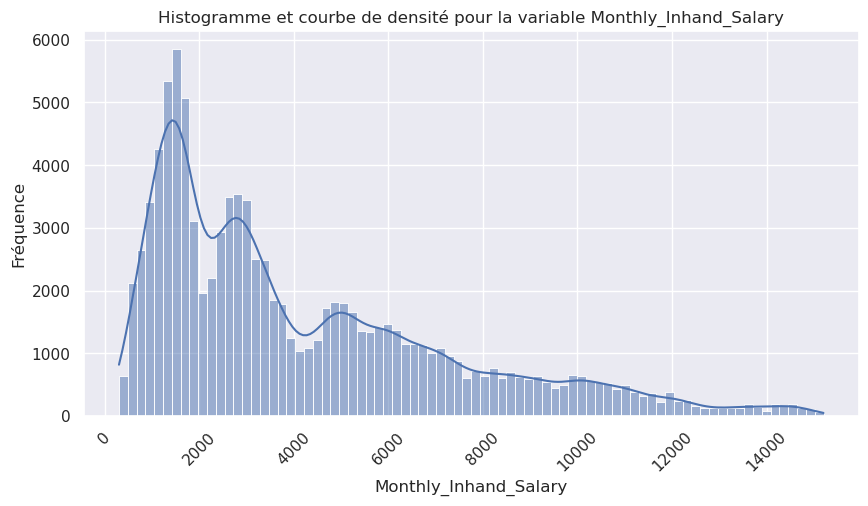

In [35]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Monthly_Inhand_Salary")
sns.histplot(df_sorted["Monthly_Inhand_Salary"], kde=True)
plt.xlabel("Monthly_Inhand_Salary")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour la variable Monthly_Inhand_Salary")
plt.xticks(rotation=45)
plt.show()

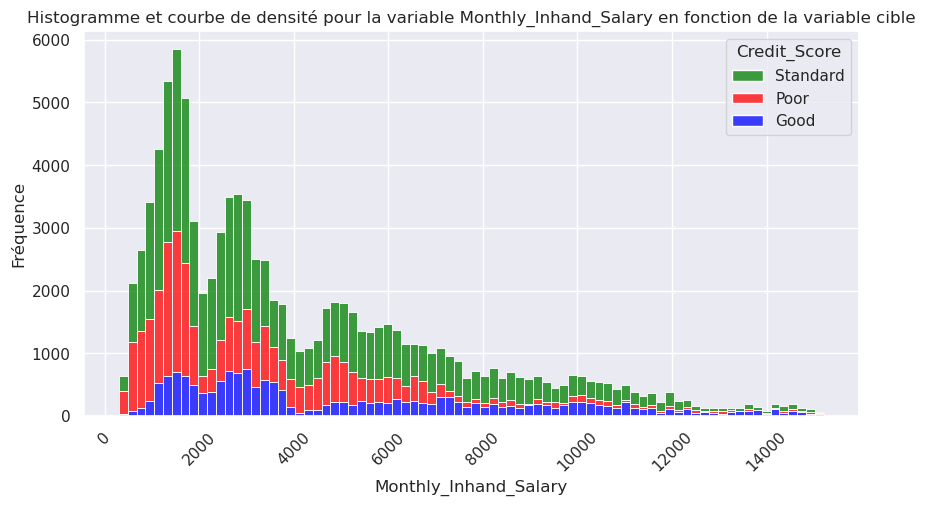

In [37]:
df_sorted = df.sort_values("Monthly_Inhand_Salary")
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_sorted,
    x="Monthly_Inhand_Salary",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Monthly_Inhand_Salary")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Monthly_Inhand_Salary en fonction de la variable cible"
)
plt.xticks(rotation=45)
plt.show()

In [36]:
stat, p = shapiro(df["Monthly_Inhand_Salary"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.8826034618147038
P-value : 9.761795039072416e-117
La variable n'est probablement pas normalement distribuée


/tmp/ipykernel_677242/1452999866.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  stat, p = shapiro(df['Monthly_Inhand_Salary'])


##### Num_Bank_Accounts 

In [38]:
# type, nombres valeurs
df["Num_Bank_Accounts"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_Bank_Accounts
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [39]:
# Taux de na
(df["Num_Bank_Accounts"].isna().sum()) / (len(df.index))

0.0

In [40]:
# Valeurs et Nombre de valeurs distinctes
print(df["Num_Bank_Accounts"].unique())
df["Num_Bank_Accounts"].nunique()

[ 3.  2.  1.  7.  4.  0.  8.  5.  6.  9. 10. 11.]


12

In [41]:
# Étendue des valeurs, Équilibre
df["Num_Bank_Accounts"].value_counts()

Num_Bank_Accounts
6.0     13175
7.0     12999
8.0     12940
4.0     12343
5.0     12298
3.0     12107
9.0      5503
10.0     5329
1.0      4540
0.0      4417
2.0      4340
11.0        9
Name: count, dtype: int64

In [42]:
# Valeur Minimale
print("min:", df["Num_Bank_Accounts"].min())
# Valeur Maximale
print("max:", df["Num_Bank_Accounts"].max())

min: 0.0
max: 11.0


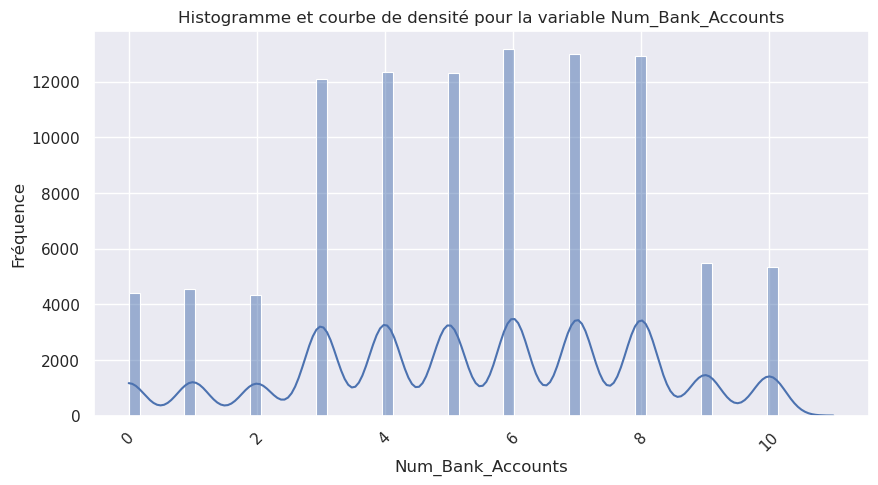

In [43]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Num_Bank_Accounts")
sns.histplot(df_sorted["Num_Bank_Accounts"], kde=True)
plt.xlabel("Num_Bank_Accounts")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour la variable Num_Bank_Accounts")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

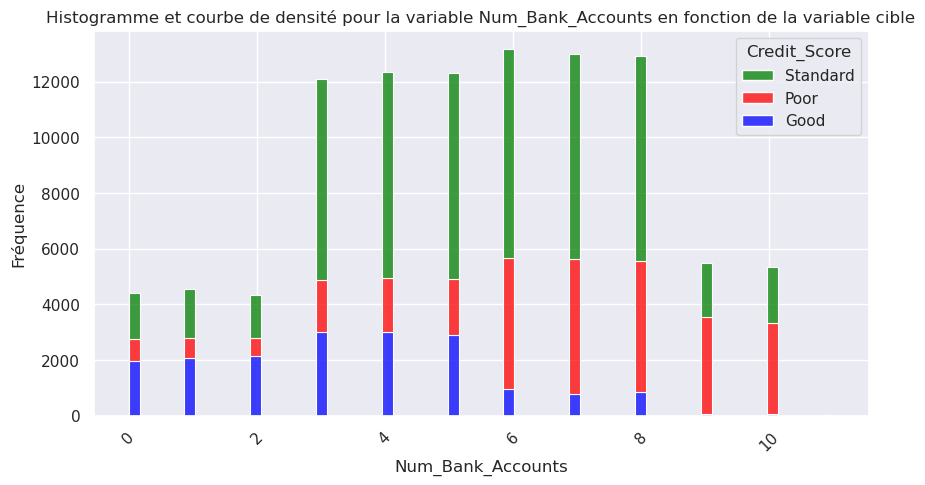

In [45]:
df_sorted = df.sort_values("Num_Bank_Accounts")
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_sorted,
    x="Num_Bank_Accounts",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Num_Bank_Accounts")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Num_Bank_Accounts en fonction de la variable cible"
)
plt.xticks(rotation=45)
plt.show()

In [44]:
stat, p = shapiro(df["Num_Bank_Accounts"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.9673999751010748
P-value : 1.0777223245101107e-83
La variable n'est probablement pas normalement distribuée


/tmp/ipykernel_677242/1494638884.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  stat, p = shapiro(df['Num_Bank_Accounts'])


##### Num_Credit_Card 

In [46]:
# type, nombres valeurs
df["Num_Credit_Card"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_Credit_Card
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [47]:
# Taux de na
(df["Num_Credit_Card"].isna().sum()) / (len(df.index))

0.0

In [48]:
# Valeurs et Nombre de valeurs distinctes
print(df["Num_Credit_Card"].unique())
df["Num_Credit_Card"].nunique()

[ 4.  5.  1.  7.  6.  8.  3.  9.  2. 10. 11.  0.]


12

In [49]:
# Étendue des valeurs, Équilibre
df["Num_Credit_Card"].value_counts()

Num_Credit_Card
5.0     18903
7.0     17024
6.0     16932
4.0     14362
3.0     13560
8.0      5073
10.0     4962
9.0      4753
2.0      2196
1.0      2185
11.0       36
0.0        14
Name: count, dtype: int64

In [50]:
# Valeur Minimale
print("min:", df["Num_Credit_Card"].min())
# Valeur Maximale
print("max:", df["Num_Credit_Card"].max())

min: 0.0
max: 11.0


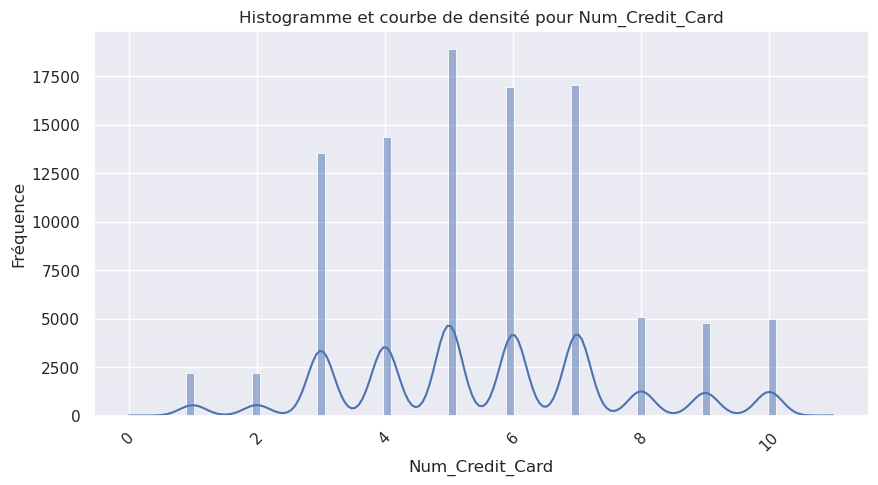

In [51]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Num_Credit_Card")
sns.histplot(df_sorted["Num_Credit_Card"], kde=True)
plt.xlabel("Num_Credit_Card")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour Num_Credit_Card")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

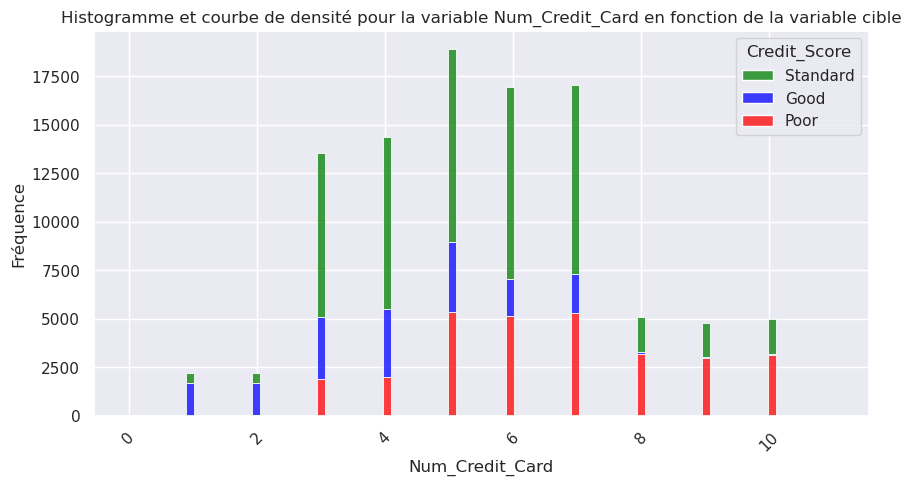

In [53]:
df_sorted = df.sort_values("Num_Credit_Card")
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_sorted,
    x="Num_Credit_Card",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Num_Credit_Card")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Num_Credit_Card en fonction de la variable cible"
)
plt.xticks(rotation=45)
plt.show()

In [52]:
stat, p = shapiro(df["Num_Credit_Card"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.9651581987600373
P-value : 2.849821233199363e-85
La variable n'est probablement pas normalement distribuée


/tmp/ipykernel_677242/2101930044.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  stat, p = shapiro(df['Num_Credit_Card'])


##### Interest_Rate


In [54]:
# type, nombres valeurs
df["Interest_Rate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Interest_Rate
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [55]:
# Taux de na
(df["Interest_Rate"].isna().sum()) / (len(df.index))

0.0

In [62]:
# Étendue des valeurs, Équilibre
df["Interest_Rate"].describe()

count    100000.00000
mean         14.53208
std           8.74133
min           1.00000
25%           7.00000
50%          13.00000
75%          20.00000
max          34.00000
Name: Interest_Rate, dtype: float64

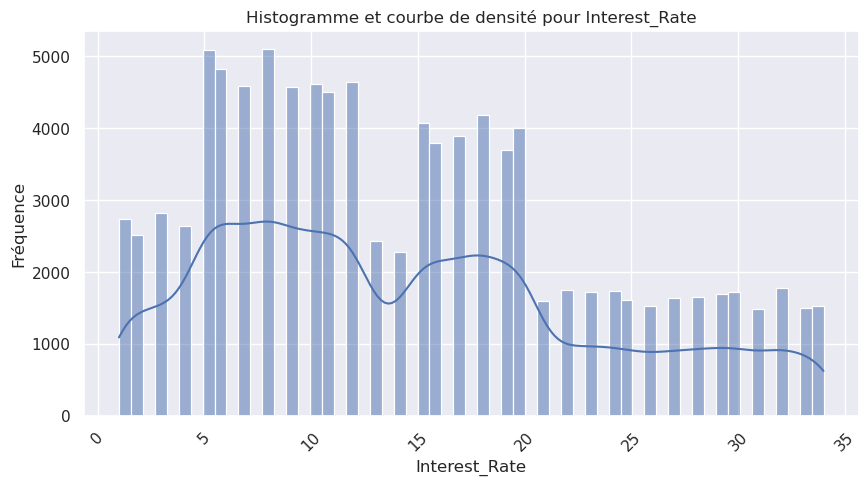

In [59]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Interest_Rate")
sns.histplot(df_sorted["Interest_Rate"], kde=True)
plt.xlabel("Interest_Rate")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour Interest_Rate")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

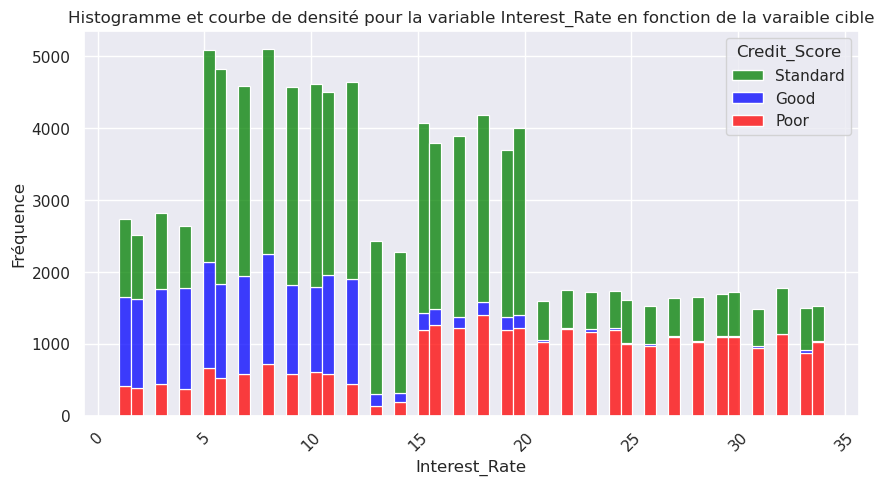

In [61]:
df_sorted = df.sort_values("Interest_Rate")
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_sorted,
    x="Interest_Rate",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Interest_Rate")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Interest_Rate en fonction de la varaible cible"
)
plt.xticks(rotation=45)
plt.show()

In [60]:
stat, p = shapiro(df["Interest_Rate"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.9525616347545385
P-value : 8.643045513662526e-93
La variable n'est probablement pas normalement distribuée


/tmp/ipykernel_677242/942107892.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  stat, p = shapiro(df['Interest_Rate'])


##### Num_of_Loan

In [63]:
# type, nombres valeurs
df["Num_of_Loan"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_of_Loan
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [64]:
# Taux de na
(df["Num_of_Loan"].isna().sum()) / (len(df.index))

0.0

In [65]:
# Étendue des valeurs, Équilibre
df["Num_of_Loan"].describe()

count    100000.000000
mean          3.532880
std           2.446356
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: Num_of_Loan, dtype: float64

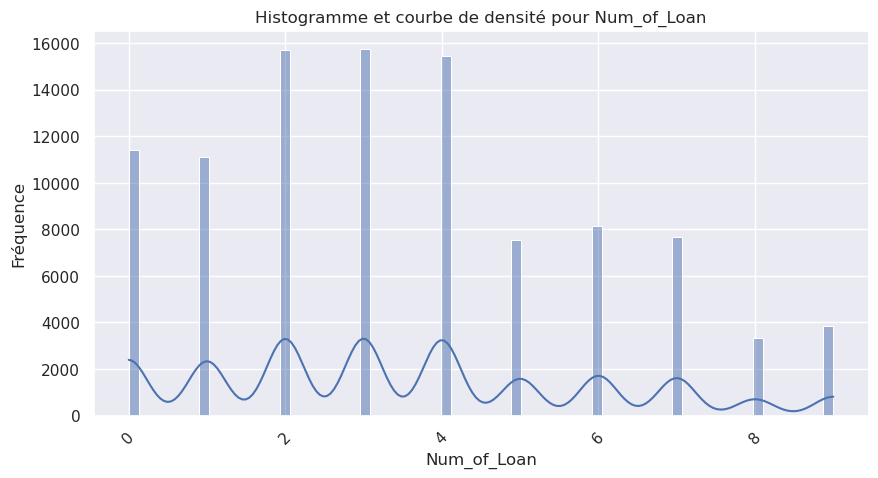

In [66]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Num_of_Loan")
sns.histplot(df_sorted["Num_of_Loan"], kde=True)
plt.xlabel("Num_of_Loan")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour Num_of_Loan")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

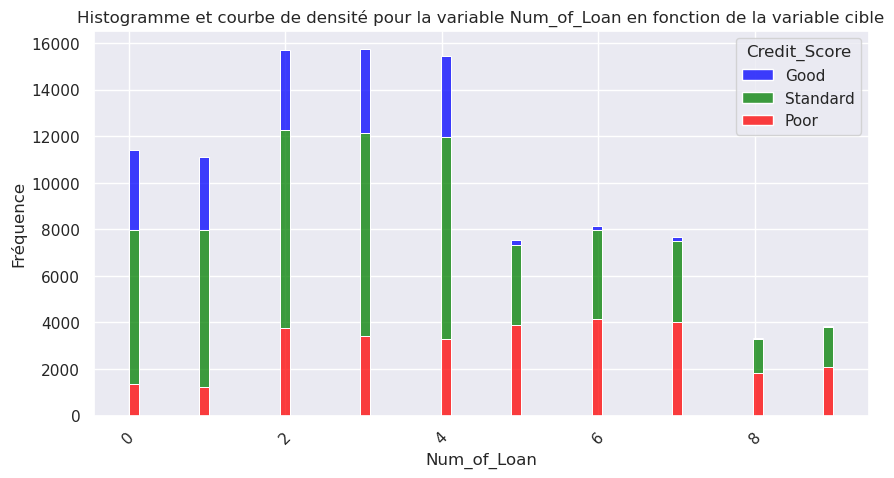

In [68]:
df_sorted = df.sort_values("Num_of_Loan")
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_sorted,
    x="Num_of_Loan",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Num_of_Loan")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Num_of_Loan en fonction de la variable cible"
)
plt.xticks(rotation=45)
plt.show()

In [67]:
stat, p = shapiro(df["Num_of_Loan"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.9452606154697178
P-value : 2.1842463327592945e-96
La variable n'est probablement pas normalement distribuée


/tmp/ipykernel_677242/2533300719.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  stat, p = shapiro(df['Num_of_Loan'])


##### Delay_from_due_date

In [69]:
# type, nombres valeurs
df["Delay_from_due_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Delay_from_due_date
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [70]:
# Taux de na
(df["Delay_from_due_date"].isna().sum()) / (len(df.index))

0.0

In [71]:
# Étendue des valeurs, Équilibre
df["Delay_from_due_date"].describe()

count    100000.00000
mean         21.08141
std          14.80456
min           0.00000
25%          10.00000
50%          18.00000
75%          28.00000
max          62.00000
Name: Delay_from_due_date, dtype: float64

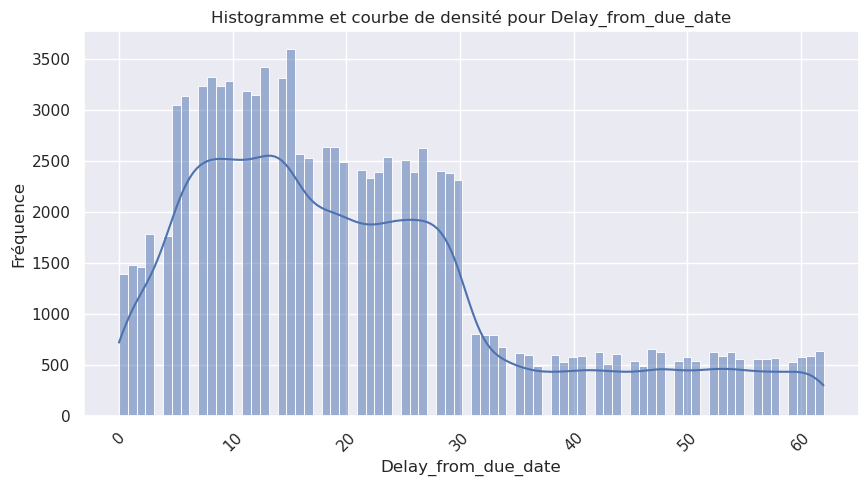

In [72]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Delay_from_due_date")
sns.histplot(df_sorted["Delay_from_due_date"], kde=True)
plt.xlabel("Delay_from_due_date")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour Delay_from_due_date")
plt.xticks(rotation=45)  # Modifier cet angle selon tes préférences
plt.show()

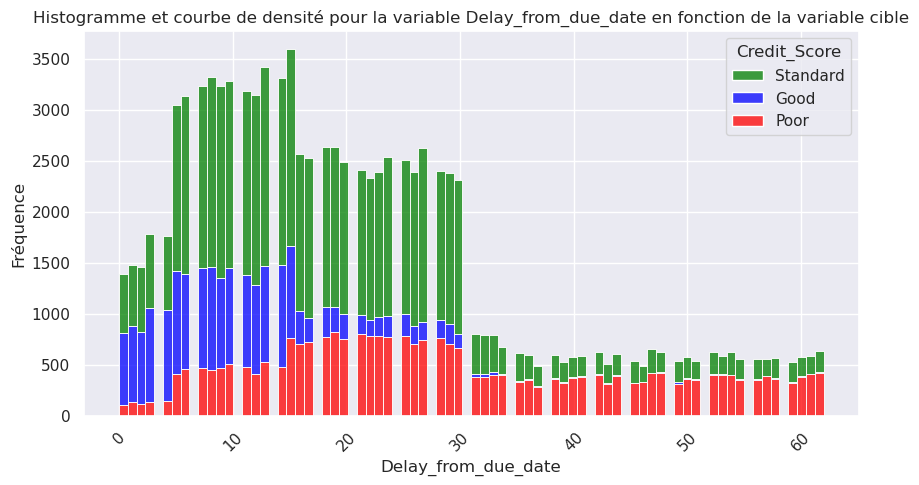

In [74]:
df_sorted = df.sort_values("Delay_from_due_date")
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_sorted,
    x="Delay_from_due_date",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Delay_from_due_date")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Delay_from_due_date en fonction de la variable cible"
)
plt.xticks(rotation=45)
plt.show()

In [73]:
stat, p = shapiro(df["Delay_from_due_date"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.9164585989496131
P-value : 2.0342794958168212e-107
La variable n'est probablement pas normalement distribuée


/tmp/ipykernel_677242/3293809332.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  stat, p = shapiro(df['Delay_from_due_date'])


##### Num_of_Delayed_Payment

In [75]:
# type, nombres valeurs
df["Num_of_Delayed_Payment"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_of_Delayed_Payment
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [76]:
# Taux de na
(df["Num_of_Delayed_Payment"].isna().sum()) / (len(df.index))

0.0

In [77]:
# Étendue des valeurs, Équilibre
df["Num_of_Delayed_Payment"].describe()

count    100000.000000
mean         13.313120
std           6.237166
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          25.000000
Name: Num_of_Delayed_Payment, dtype: float64

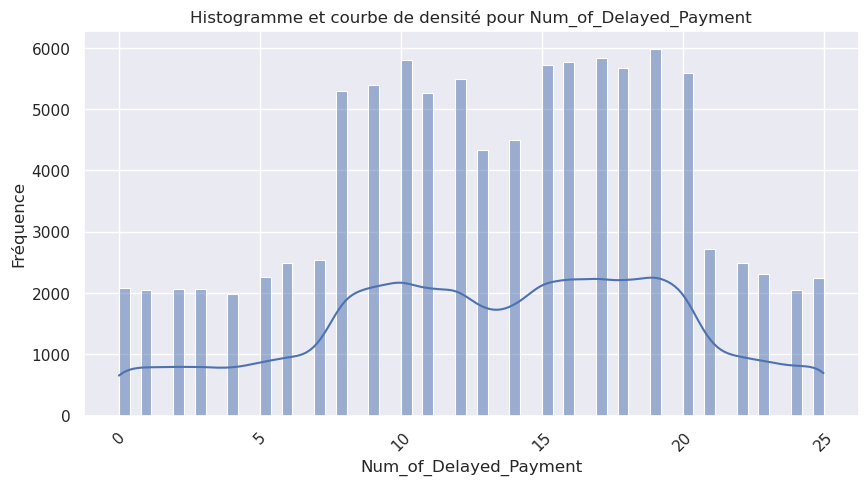

In [79]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Num_of_Delayed_Payment")
sns.histplot(df_sorted["Num_of_Delayed_Payment"], kde=True)
plt.xlabel("Num_of_Delayed_Payment")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour Num_of_Delayed_Payment")
plt.xticks(rotation=45)
plt.show()

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30')])

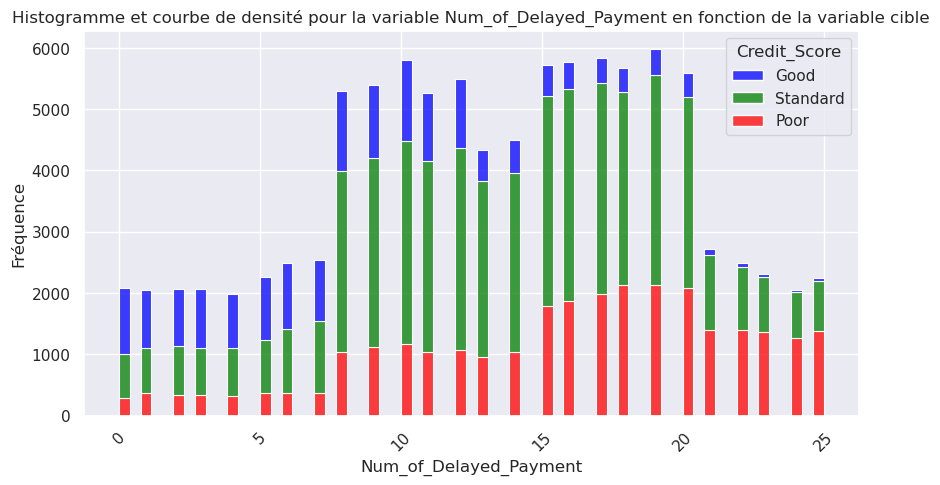

In [80]:
df_sorted = df.sort_values("Num_of_Delayed_Payment")
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_sorted,
    x="Num_of_Delayed_Payment",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Num_of_Delayed_Payment")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Num_of_Delayed_Payment en fonction de la variable cible"
)
plt.xticks(rotation=45)

In [81]:
stat, p = shapiro(df["Num_of_Delayed_Payment"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.9784054684459514
P-value : 2.939244859466426e-74
La variable n'est probablement pas normalement distribuée


/tmp/ipykernel_677242/2455743850.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  stat, p = shapiro(df['Num_of_Delayed_Payment'])


##### Num_Credit_Inquiries

In [90]:
# type, nombres valeurs
df["Num_Credit_Inquiries"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Num_Credit_Inquiries
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [87]:
# Taux de na
(df["Num_Credit_Inquiries"].isna().sum()) / (len(df.index))

0.0

In [88]:
# Étendue des valeurs, Équilibre
df["Num_Credit_Inquiries"].describe()

count    100000.000000
mean          5.798250
std           3.867826
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          17.000000
Name: Num_Credit_Inquiries, dtype: float64

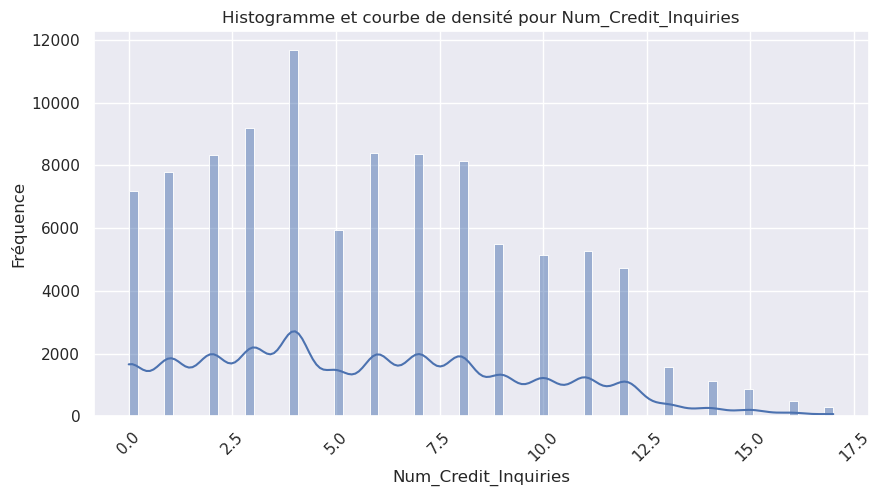

In [89]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Num_Credit_Inquiries")
sns.histplot(df_sorted["Num_Credit_Inquiries"], kde=True)
plt.xlabel("Num_Credit_Inquiries")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour Num_Credit_Inquiries")
plt.xticks(rotation=45)
plt.show()

(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(-2.5, 0, '−2.5'),
  Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0')])

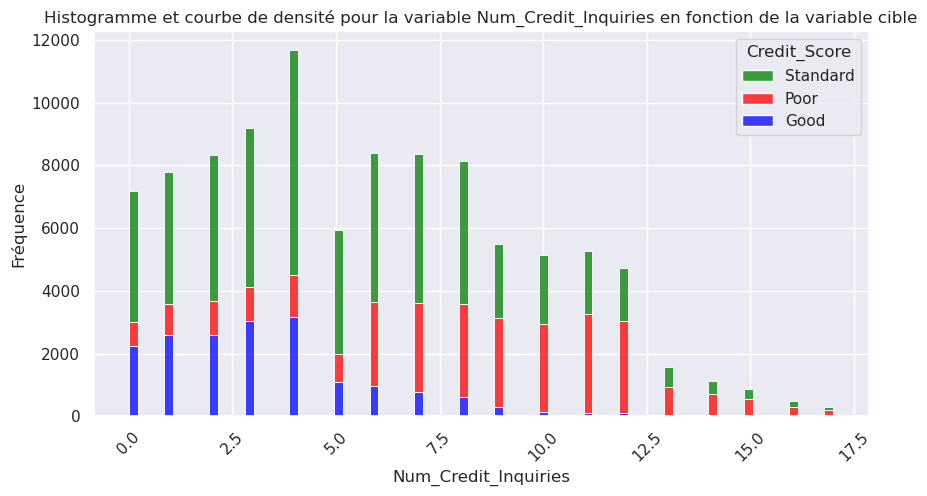

In [91]:
df_sorted = df.sort_values("Num_Credit_Inquiries")
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_sorted,
    x="Num_Credit_Inquiries",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Num_Credit_Inquiries")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Num_Credit_Inquiries en fonction de la variable cible"
)
plt.xticks(rotation=45)

In [92]:
stat, p = shapiro(df["Num_Credit_Inquiries"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.9610038140882288
P-value : 5.600096529184254e-88
La variable n'est probablement pas normalement distribuée


/tmp/ipykernel_677242/1898736438.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  stat, p = shapiro(df['Num_Credit_Inquiries'])


##### Outstanding_Debt

In [5]:
# type, nombres valeurs
df["Outstanding_Debt"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Outstanding_Debt
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [6]:
# Taux de na
(df["Outstanding_Debt"].isna().sum()) / (len(df.index))

0.0

In [7]:
# Étendue des valeurs, Équilibre
df["Outstanding_Debt"].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

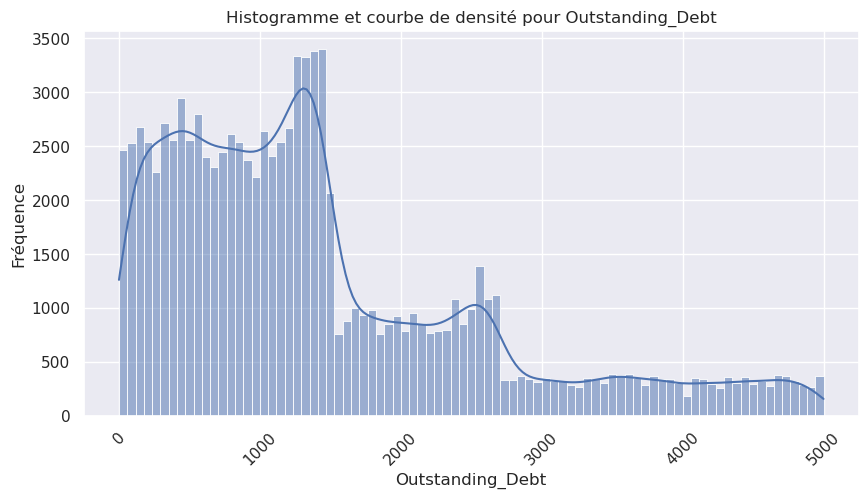

In [8]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Outstanding_Debt")
sns.histplot(df_sorted["Outstanding_Debt"], kde=True)
plt.xlabel("Outstanding_Debt")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour Outstanding_Debt")
plt.xticks(rotation=45)
plt.show()

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

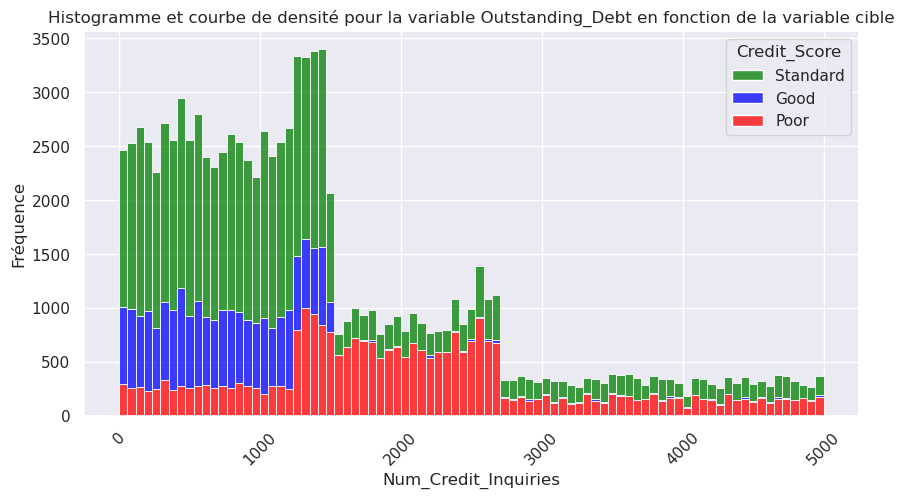

In [9]:
df_sorted = df.sort_values("Outstanding_Debt")
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_sorted,
    x="Outstanding_Debt",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Num_Credit_Inquiries")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Outstanding_Debt en fonction de la variable cible"
)
plt.xticks(rotation=45)

In [10]:
stat, p = shapiro(df["Outstanding_Debt"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.8835571664499029
P-value : 1.6503220142199187e-116
La variable n'est probablement pas normalement distribuée


/opt/mamba/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


##### Credit_Utilization_Ratio

In [11]:
# type, nombres valeurs
df["Credit_Utilization_Ratio"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_Utilization_Ratio
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [12]:
# Taux de na
(df["Credit_Utilization_Ratio"].isna().sum()) / (len(df.index))

0.0

In [13]:
# Étendue des valeurs, Équilibre
df["Credit_Utilization_Ratio"].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

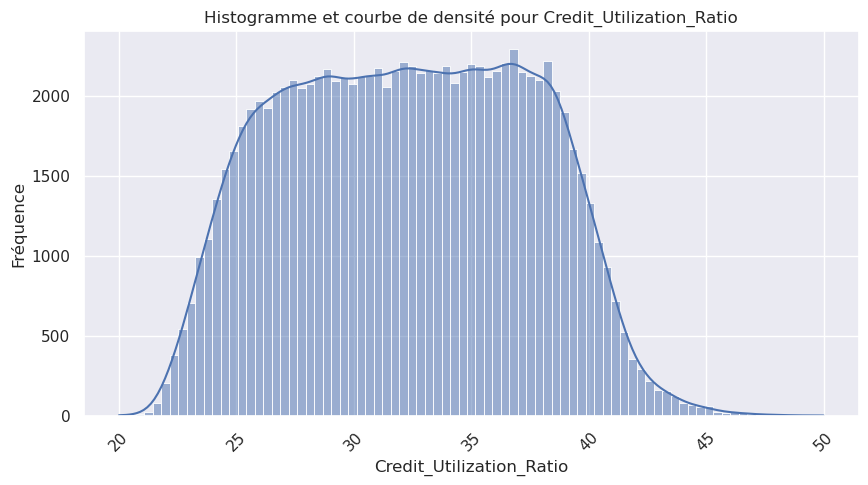

In [14]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Credit_Utilization_Ratio")
sns.histplot(df_sorted["Credit_Utilization_Ratio"], kde=True)
plt.xlabel("Credit_Utilization_Ratio")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour Credit_Utilization_Ratio")
plt.xticks(rotation=45)
plt.show()

(array([15., 20., 25., 30., 35., 40., 45., 50., 55.]),
 [Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40'),
  Text(45.0, 0, '45'),
  Text(50.0, 0, '50'),
  Text(55.0, 0, '55')])

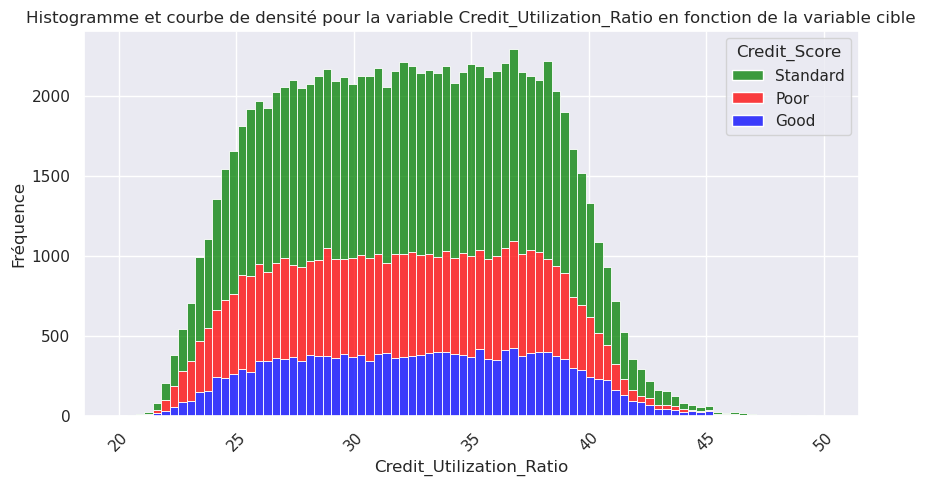

In [15]:
df_sorted = df.sort_values("Credit_Utilization_Ratio")
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_sorted,
    x="Credit_Utilization_Ratio",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Credit_Utilization_Ratio")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Credit_Utilization_Ratio en fonction de la variable cible"
)
plt.xticks(rotation=45)

In [16]:
stat, p = shapiro(df["Credit_Utilization_Ratio"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.9785071914610007
P-value : 3.7416409187830534e-74
La variable n'est probablement pas normalement distribuée


/opt/mamba/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


##### Credit_History_Age

In [17]:
# type, nombres valeurs
df["Credit_History_Age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_History_Age
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [18]:
# Taux de na
(df["Credit_History_Age"].isna().sum()) / (len(df.index))

0.0

In [19]:
# Étendue des valeurs, Équilibre
df["Credit_History_Age"].describe()

count    100000.000000
mean        221.220460
std          99.680716
min           1.000000
25%         144.000000
50%         219.000000
75%         302.000000
max         404.000000
Name: Credit_History_Age, dtype: float64

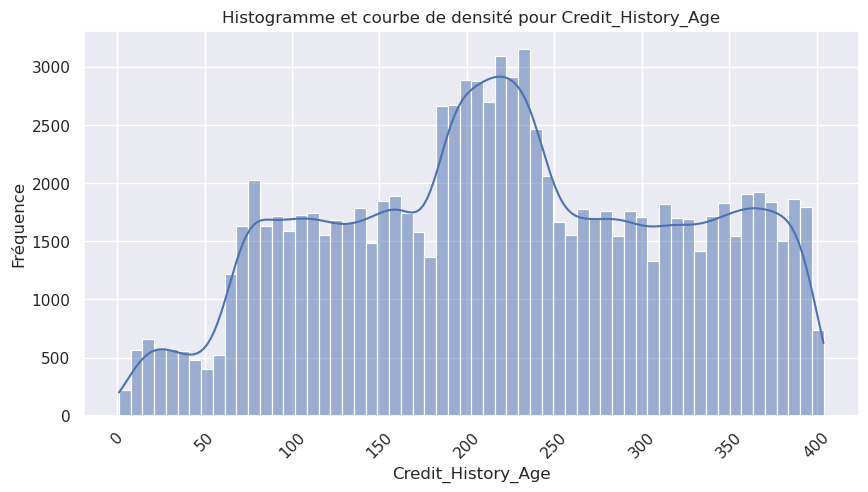

In [20]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Credit_History_Age")
sns.histplot(df_sorted["Credit_History_Age"], kde=True)
plt.xlabel("Credit_History_Age")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour Credit_History_Age")
plt.xticks(rotation=45)
plt.show()

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400'),
  Text(450.0, 0, '450')])

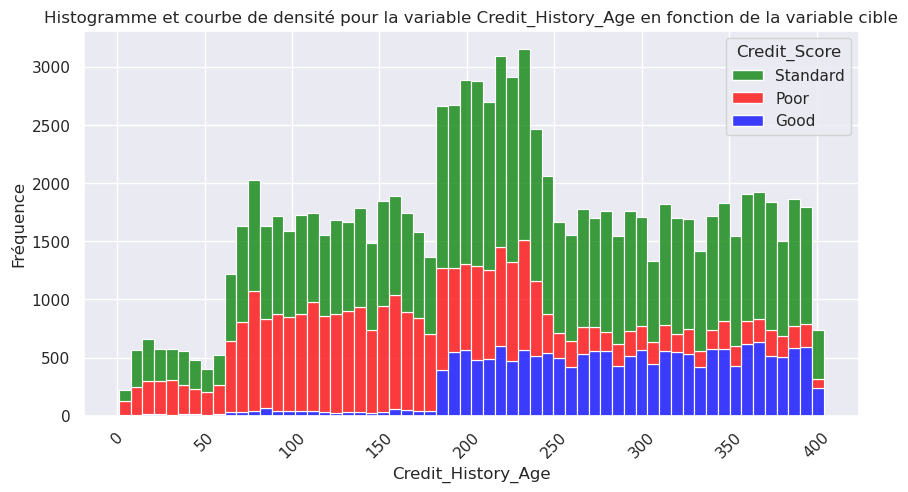

In [23]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Credit_History_Age")
sns.histplot(
    data=df_sorted,
    x="Credit_History_Age",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Credit_History_Age")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Credit_History_Age en fonction de la variable cible"
)
plt.xticks(rotation=45)

In [22]:
stat, p = shapiro(df["Credit_History_Age"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.9757102458082213
P-value : 6.801806800410781e-77
La variable n'est probablement pas normalement distribuée


/opt/mamba/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


##### Total_EMI_per_month

In [24]:
# type, nombres valeurs
df["Total_EMI_per_month"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Total_EMI_per_month
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [25]:
# Taux de na
(df["Total_EMI_per_month"].isna().sum()) / (len(df.index))

0.0

In [26]:
# Étendue des valeurs, Équilibre
df["Total_EMI_per_month"].describe()

count    100000.000000
mean        107.699208
std         132.267056
min           0.000000
25%          29.268886
50%          66.462304
75%         147.392573
max        1779.103254
Name: Total_EMI_per_month, dtype: float64

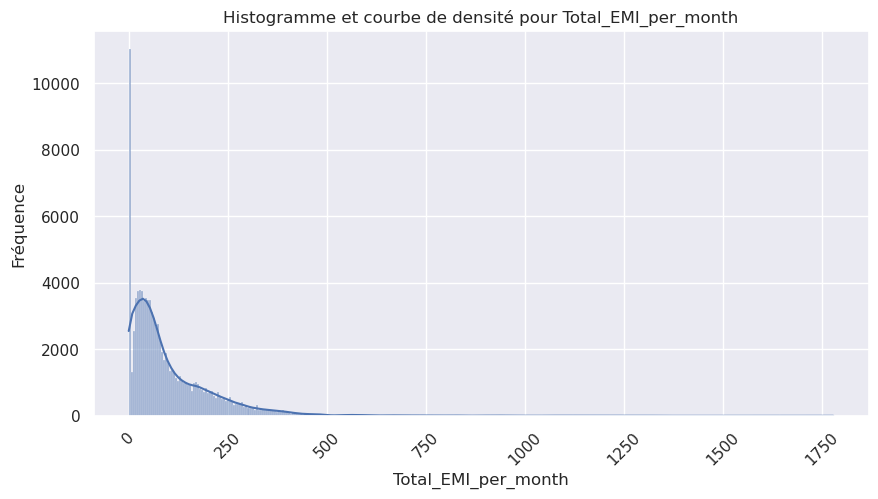

In [27]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Total_EMI_per_month")
sns.histplot(df_sorted["Total_EMI_per_month"], kde=True)
plt.xlabel("Total_EMI_per_month")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour Total_EMI_per_month")
plt.xticks(rotation=45)
plt.show()

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(-250.0, 0, '−250'),
  Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000')])

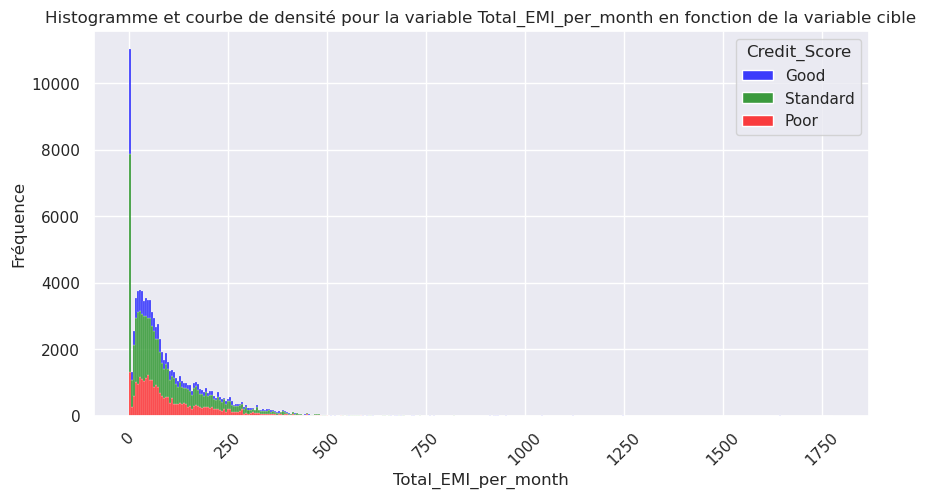

In [28]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Total_EMI_per_month")
sns.histplot(
    data=df_sorted,
    x="Total_EMI_per_month",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Total_EMI_per_month")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Total_EMI_per_month en fonction de la variable cible"
)
plt.xticks(rotation=45)

In [29]:
stat, p = shapiro(df["Total_EMI_per_month"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.6802551698966036
P-value : 1.7994921496810915e-146
La variable n'est probablement pas normalement distribuée


/opt/mamba/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


##### Amount_invested_monthly

In [30]:
# type, nombres valeurs
df["Amount_invested_monthly"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Amount_invested_monthly
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [31]:
# Taux de na
(df["Amount_invested_monthly"].isna().sum()) / (len(df.index))

0.0

In [32]:
# Étendue des valeurs, Équilibre
df["Amount_invested_monthly"].describe()

count    100000.000000
mean         55.101315
std          39.006932
min           0.000000
25%          27.959111
50%          45.156550
75%          71.295797
max         434.191089
Name: Amount_invested_monthly, dtype: float64

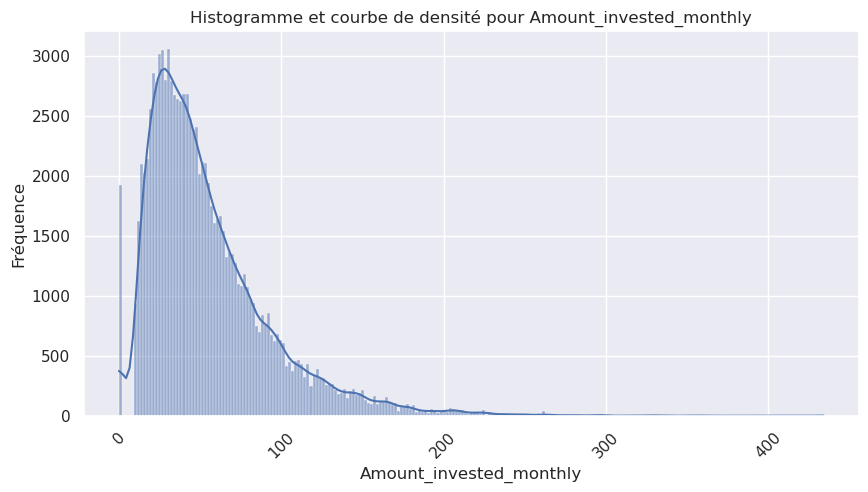

In [33]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Amount_invested_monthly")
sns.histplot(df_sorted["Amount_invested_monthly"], kde=True)
plt.xlabel("Amount_invested_monthly")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour Amount_invested_monthly")
plt.xticks(rotation=45)
plt.show()

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500')])

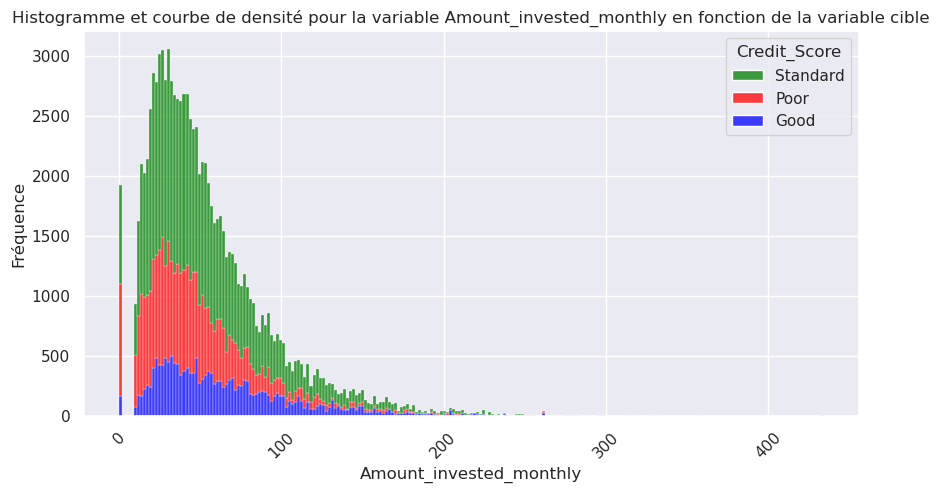

In [34]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Amount_invested_monthly")
sns.histplot(
    data=df_sorted,
    x="Amount_invested_monthly",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Amount_invested_monthly")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Amount_invested_monthly en fonction de la variable cible"
)
plt.xticks(rotation=45)

In [35]:
stat, p = shapiro(df["Amount_invested_monthly"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.866134736052588
P-value : 1.9425068415262752e-120
La variable n'est probablement pas normalement distribuée


/opt/mamba/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


##### Monthly_Balance

In [42]:
# type, nombres valeurs
df["Monthly_Balance"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Monthly_Balance
Non-Null Count   Dtype  
--------------   -----  
100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


In [43]:
# Taux de na
(df["Monthly_Balance"].isna().sum()) / (len(df.index))

0.0

In [44]:
# Étendue des valeurs, Équilibre
df["Monthly_Balance"].describe()

count    100000.000000
mean        392.697586
std         201.652719
min           0.007760
25%         267.615983
50%         333.865366
75%         463.215683
max        1183.930696
Name: Monthly_Balance, dtype: float64

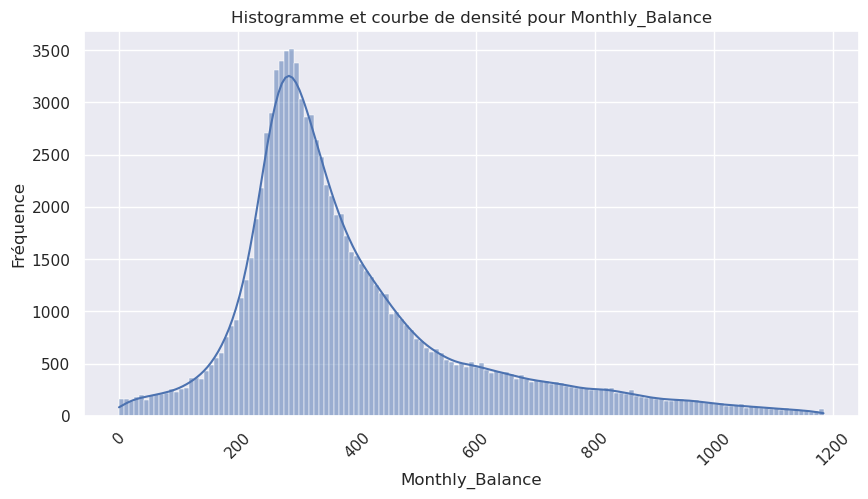

In [45]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Monthly_Balance")
sns.histplot(df_sorted["Monthly_Balance"], kde=True)
plt.xlabel("Monthly_Balance")
plt.ylabel("Fréquence")
plt.title("Histogramme et courbe de densité pour Monthly_Balance")
plt.xticks(rotation=45)
plt.show()

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400')])

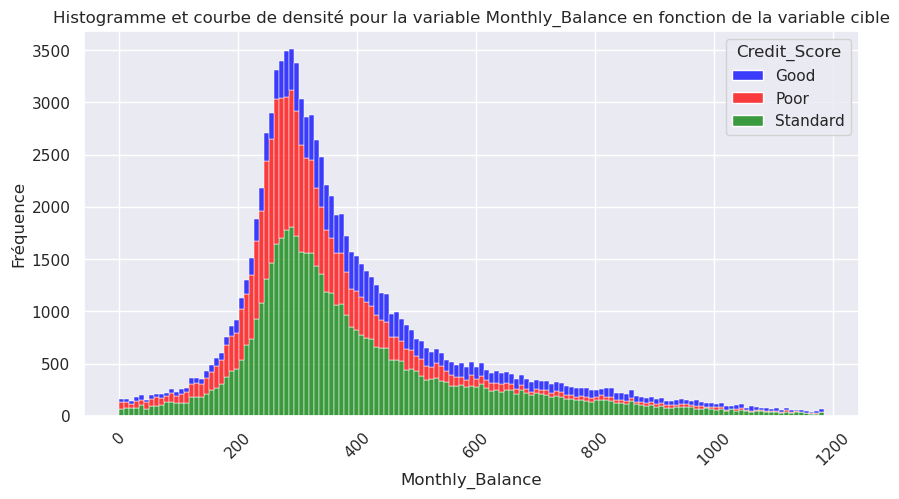

In [46]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("Monthly_Balance")
sns.histplot(
    data=df_sorted,
    x="Monthly_Balance",
    hue="Credit_Score",
    palette={"Poor": "red", "Standard": "green", "Good": "blue"},
    multiple="stack",
)
plt.xlabel("Monthly_Balance")
plt.ylabel("Fréquence")
plt.title(
    "Histogramme et courbe de densité pour la variable Monthly_Balance en fonction de la variable cible"
)
plt.xticks(rotation=45)

In [47]:
stat, p = shapiro(df["Monthly_Balance"])

print("Statistique de test :", stat)
print("P-value :", p)

alpha = 0.05
if p > alpha:
    print("La variable est probablement normalement distribuée")
else:
    print("La variable n'est probablement pas normalement distribuée")

Statistique de test : 0.8845141158293708
P-value : 2.8056796452956916e-116
La variable n'est probablement pas normalement distribuée


/opt/mamba/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)
